# Mitochondria and synapses

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import seaborn as sns

from scipy.stats import pearsonr, ranksums, ttest_ind

%matplotlib inline

In [2]:
timepoint = [5, 23, 27, 50, 69.5]
bound = [15, 25, 35, 47, 62]
stage_cmap = sns.color_palette("deep",8)
type_cmap = [(253/255, 225/255, 245/255),
             (1, 183/255, 139/255),
             (167/255, 217/255, 245/255)]

## Load data

In [3]:
cell_df = pd.read_csv("neuron_list_hobert.csv")
cell_df.head()

,name,id,type,class,neurotransmitter1,neurotransmitter2,l1_vol,l2_vol,l3_vol,adult_vol,dauer_vol
0,ADAL,1,2,ADA,Glutamate,NaN,0.701728,1.273221,1.371940,3.494185,1.159168
1,ADAR,2,2,ADA,Glutamate,NaN,0.644497,1.260319,1.613807,2.878003,1.017088
2,ADEL,3,1,ADE,Dopamine,NaN,0.364170,1.336320,1.832287,7.324293,0.791347
3,ADER,4,1,ADE,Dopamine,NaN,0.297124,1.328579,1.841921,6.864507,0.781312
4,ADFL,5,1,ADF,Acetylcholine,Serotonin,0.753066,1.446728,2.018413,3.728548,1.827789


In [4]:
l1_mito_df = pd.read_csv("240527_dataset2_mito_neuron.csv")
l2_mito_df = pd.read_csv("240527_dataset5_mito_neuron.csv")
l3_mito_df = pd.read_csv("240527_dataset6_mito_neuron.csv")
adult_mito_df = pd.read_csv("240527_dataset8_mito_neuron.csv")
dauer_mito_df = pd.read_csv("240527_dauer1_mito_neuron.csv")
dauer_mito_df.head()

,cell_name,cell_id,cell_common_id,class,mito_id,cell_vol,mito_vol,cell_surf,mito_surf,x_pos,y_pos,z_pos,mito_len,dist_pre,dist_post
0,AIBR,15,14,2,747,2.679757,0.021658,29.616532,0.372357,5.868936,2.328813,4.282388,1.328166,0.619359,0.666193
1,AIBR,15,14,2,977,2.679757,0.022989,29.616532,0.438184,7.818976,3.981256,5.437973,0.960554,0.472862,0.581278
2,AIBR,15,14,2,1346,2.679757,0.008806,29.616532,0.194831,4.602977,2.567442,7.082849,0.874920,2.611763,0.339316
3,AIBR,15,14,2,1400,2.679757,0.020378,29.616532,0.411419,7.925869,5.646151,7.352387,1.726368,0.232002,0.817458
4,AIBR,15,14,2,2008,2.679757,0.010291,29.616532,0.250027,6.260060,7.735721,10.437065,1.414361,0.206209,0.813789


In [5]:
l1_syn_df = pd.read_csv("240527_dataset2_synapse.csv")
l2_syn_df = pd.read_csv("240527_dataset5_synapse.csv")
l3_syn_df = pd.read_csv("240527_dataset6_synapse.csv")
adult_syn_df = pd.read_csv("240527_dataset8_synapse.csv")
dauer_syn_df = pd.read_csv("240527_dauer1_synapse.csv")
dauer_syn_df.head()

,syn_id,pre,pre_id,pre_common_id,post,post_id,post_common_id,x_pos,y_pos,z_pos,size
0,1,RIH,145,124,CEPDL,187,71,6264,3540,50,56629.85685
1,1,RIH,145,124,OLQDL,189,95,6264,3540,50,115370.14310
2,2,RIH,145,124,URXR,179,181,3312,3848,50,529157.36040
3,2,RIH,145,124,IL2DR,182,88,3312,3848,50,153855.83760
4,2,RIH,145,124,CEPDR,186,72,3312,3848,50,17786.80203


## Amount of mitochondria is correlated with synaptic strength

In [6]:
def get_outdeg(syn_df, cellid):
    
    return np.sum(syn_df["pre_common_id"]==cellid)

def get_indeg(syn_df, cellid):
    
    return np.sum(syn_df["post_common_id"]==cellid)

def get_nmito(mito_df, cellid):
    
    return np.sum(mito_df["cell_common_id"]==cellid)

def get_mitovol(mito_df, cellid):
    
    return np.sum(mito_df[mito_df["cell_common_id"]==cellid]["mito_vol"])

def compute_all(df, func):
    
    cell_list = cell_df["id"].values
    n = cell_list.shape[0]
    
    res = np.zeros(n)
    for i in range(n):
        res[i] = func(df, cell_list[i])

    return res

def get_linfit(x, y):
    
    X = sm.add_constant(x)
    re = sm.OLS(y, X).fit()
    
    xlin = np.linspace(0,x.max()*1.2,100)
    Xlin = sm.add_constant(xlin)
    dt = re.get_prediction(Xlin).summary_frame(alpha=0.2)
    
    return xlin, dt

In [7]:
l1_outdeg = compute_all(l1_syn_df, get_outdeg)
l2_outdeg = compute_all(l2_syn_df, get_outdeg)
l3_outdeg = compute_all(l3_syn_df, get_outdeg)
adult_outdeg = compute_all(adult_syn_df, get_outdeg)
dauer_outdeg = compute_all(dauer_syn_df, get_outdeg)

In [8]:
l1_indeg = compute_all(l1_syn_df, get_indeg)
l2_indeg = compute_all(l2_syn_df, get_indeg)
l3_indeg = compute_all(l3_syn_df, get_indeg)
adult_indeg = compute_all(adult_syn_df, get_indeg)
dauer_indeg = compute_all(dauer_syn_df, get_indeg)

In [9]:
l1_nmito = compute_all(l1_mito_df, get_nmito)
l2_nmito = compute_all(l2_mito_df, get_nmito)
l3_nmito = compute_all(l3_mito_df, get_nmito)
adult_nmito = compute_all(adult_mito_df, get_nmito)
dauer_nmito = compute_all(dauer_mito_df, get_nmito)

In [10]:
l1_mitovol = compute_all(l1_mito_df, get_mitovol)
l2_mitovol = compute_all(l2_mito_df, get_mitovol)
l3_mitovol = compute_all(l3_mito_df, get_mitovol)
adult_mitovol = compute_all(adult_mito_df, get_mitovol)
dauer_mitovol = compute_all(dauer_mito_df, get_mitovol)

In [11]:
valid = (adult_outdeg>0)*(adult_nmito>0)
adult_outdeg_pre = adult_outdeg[valid]
adult_nmito_pre = adult_nmito[valid]
adult_mitovol_pre = adult_mitovol[valid]

valid = (adult_indeg>0)*(adult_nmito>0)
adult_indeg_post = adult_indeg[valid]
adult_nmito_post = adult_nmito[valid]
adult_mitovol_post = adult_mitovol[valid]

In [12]:
fs_tick = 12
fs_lab = 13

def plot1(ax):
    
    xlin, dt = get_linfit(adult_nmito_pre, adult_outdeg_pre)
    
    xticks = np.arange(0, 36, 5)
    xticklab = ["0","","10","","20","","30",""]
    yticks = np.arange(0, 145, 20)
    yticklab = ["0","","40","","80","","120",""]
    
    ax.plot(adult_nmito_pre, adult_outdeg_pre, "k.",
            alpha=0.6, markeredgewidth=0, markersize=6)
    ax.plot(xlin, dt["mean"], "-", alpha=0.8,
            color=stage_cmap[3])
    plt.fill_between(xlin, dt["obs_ci_lower"], dt["obs_ci_upper"],
                     alpha=0.2, color="gray", linewidth=0)
    
    ax.set_xlim(0, 36)
    ax.set_ylim(0, 150)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklab, fontsize=fs_tick, fontname="Arial")
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticklab, fontsize=fs_tick, fontname="Arial")
    ax.set_xlabel("Num. of mito.", fontsize=fs_lab, fontname="Arial")
    ax.set_ylabel("Out-degree", fontsize=fs_lab, fontname="Arial")
    
def plot2(ax):
    
    xlin, dt = get_linfit(adult_mitovol_pre, adult_outdeg_pre)
    
    xticks = np.arange(0,0.9,0.2)
    xticklab = ["0","","0.4","","0.8"]
    yticks = np.arange(0, 145, 20)
    yticklab = ["0","","40","","80","","120",""]
    
    ax.plot(adult_mitovol_pre, adult_outdeg_pre, "k.",
            alpha=0.6, markeredgewidth=0, markersize=6)
    ax.plot(xlin, dt["mean"], "-", alpha=0.8,
            color=stage_cmap[3])
    plt.fill_between(xlin, dt["obs_ci_lower"], dt["obs_ci_upper"],
                     alpha=0.2, color="gray", linewidth=0)
    
    ax.set_xlim(0, 0.9)
    ax.set_ylim(0, 150)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklab, fontsize=fs_tick, fontname="Arial")
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticklab, fontsize=fs_tick, fontname="Arial")
    ax.set_xlabel("Mito. volume ($\mu m^3$)", fontsize=fs_lab, fontname="Arial")

def plot3(ax):
    
    xlin, dt = get_linfit(adult_nmito_post, adult_indeg_post)
    
    xticks = np.arange(0, 36, 5)
    xticklab = ["0","","10","","20","","30",""]
    yticks = np.arange(0, 190, 20)
    yticklab = ["0","","40","","80","","120","","160",""]
    
    ax.plot(adult_nmito_post, adult_indeg_post, "k.",
            alpha=0.6, markeredgewidth=0, markersize=6)
    ax.plot(xlin, dt["mean"], "-", alpha=0.8,
            color=stage_cmap[3])
    plt.fill_between(xlin, dt["obs_ci_lower"], dt["obs_ci_upper"],
                     alpha=0.2, color="gray", linewidth=0)
    
    ax.set_xlim(0, 36)
    ax.set_ylim(0, 190)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklab, fontsize=fs_tick, fontname="Arial")
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticklab, fontsize=fs_tick, fontname="Arial")
    ax.set_xlabel("Num. of mito.", fontsize=fs_lab, fontname="Arial")
    ax.set_ylabel("In-degree", fontsize=fs_lab, fontname="Arial")
    
def plot4(ax):
    
    xlin, dt = get_linfit(adult_mitovol_post, adult_indeg_post)
    
    xticks = np.arange(0,0.9,0.2)
    xticklab = ["0","","0.4","","0.8"]
    yticks = np.arange(0, 190, 20)
    yticklab = ["0","","40","","80","","120","","160",""]
    
    ax.plot(adult_mitovol_post, adult_indeg_post, "k.",
            alpha=0.6, markeredgewidth=0, markersize=6)
    ax.plot(xlin, dt["mean"], "-", alpha=0.8,
            color=stage_cmap[3])
    plt.fill_between(xlin, dt["obs_ci_lower"], dt["obs_ci_upper"],
                     alpha=0.2, color="gray", linewidth=0)
    
    ax.set_xlim(0, 0.9)
    ax.set_ylim(0, 190)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklab, fontsize=fs_tick, fontname="Arial")
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticklab, fontsize=fs_tick, fontname="Arial")
    ax.set_xlabel("Mito. volume ($\mu m^3$)", fontsize=fs_lab, fontname="Arial")

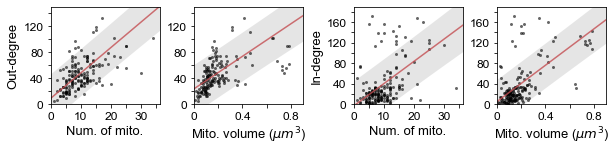

From left to right:
p = 1.6985157415663383e-20
p = 2.4587861747351174e-18
p = 1.891848187930895e-16
p = 2.157189490135353e-25


In [13]:
fig = plt.figure(figsize=(8.4,2), constrained_layout=True)
gs = fig.add_gridspec(1,4,wspace=0.05)

ax1 = fig.add_subplot(gs[0,0])
plot1(ax1)

ax2 = fig.add_subplot(gs[0,1])
plot2(ax2)

ax3 = fig.add_subplot(gs[0,2])
plot3(ax3)

ax4 = fig.add_subplot(gs[0,3])
plot4(ax4)

plt.savefig("/home/jabae/Dropbox/SNU/Research/Celegans/Cmito/figures/figure_v2/panels/fig2_1.svg")
plt.show()

r1, p1 = pearsonr(adult_nmito_pre, adult_outdeg_pre)
r2, p2 = pearsonr(adult_mitovol_pre, adult_outdeg_pre)
r3, p3 = pearsonr(adult_nmito_post, adult_indeg_post)
r4, p4 = pearsonr(adult_mitovol_post, adult_indeg_post)

print(f"From left to right:\np = {p1}\np = {p2}\np = {p3}\np = {p4}")

In [14]:
print(r1, r2, r3, r4)

0.6474015842953049 0.6180346580936948 0.564444692001618 0.6774715317257851


## Distance to closest mitochondria

In [14]:
def dist(x, y):
    
    x = x.reshape((-1,3))
    y = y.reshape((-1,3))
    
    return np.sum((x-y)**2, axis=1)**0.5

def get_dist_from_syn(syn_df, mito_df, mode="pre"):
    
    if mode=="pre":
        
        syn_id_list = np.unique(syn_df["syn_id"])
        n = syn_id_list.shape[0]
        dist_from_syn = np.zeros(n)
        for i in range(n):
            
            syn_id = syn_id_list[i]
            syn_loc = syn_df[syn_df["syn_id"]==syn_id][["x_pos", "y_pos", "z_pos"]].values[0,:]/1000
            cell_id = syn_df[syn_df["syn_id"]==syn_id]["pre_common_id"].values[0]

            valid = mito_df["cell_common_id"]==cell_id
            if np.sum(valid)==0:
                continue
            mito_loc_list = mito_df[valid][["x_pos", "y_pos", "z_pos"]].values
            dist_list = dist(mito_loc_list, syn_loc)
            dist_from_syn[i] = np.min(dist_list)
            
    elif mode=="post":
        
        n = syn_df.shape[0]
        dist_from_syn = np.zeros(n)
        for i in range(n):
        
            syn_loc = syn_df.iloc[i][["x_pos", "y_pos", "z_pos"]].values/1000
            cell_id = syn_df.iloc[i]["post_common_id"]

            valid = mito_df["cell_common_id"]==cell_id
            if np.sum(valid)==0:
                continue
            mito_loc_list = mito_df[valid][["x_pos", "y_pos", "z_pos"]].values
            dist_list = dist(mito_loc_list, syn_loc)
            dist_from_syn[i] = np.min(dist_list)
    
    return dist_from_syn

def get_dist_from_syn_rand(syn_df, mito_df, mode="pre"):
    
    if mode=="pre":
        
        syn_id_list = np.unique(syn_df["syn_id"])
        n = syn_id_list.shape[0]
        dist_from_syn = np.zeros(n)
        for i in range(n):
            
            syn_id = syn_id_list[i]
            syn_loc = syn_df[syn_df["syn_id"]==syn_id][["x_pos", "y_pos", "z_pos"]].values[0,:]/1000
            cell_id = syn_df[syn_df["syn_id"]==syn_id]["pre_common_id"].values[0]

            valid = mito_df["cell_common_id"]==cell_id
            if np.sum(valid)==0:
                continue
            mito_loc_list = mito_df[valid][["x_pos", "y_pos", "z_pos"]].values
            dist_list = dist(mito_loc_list, syn_loc)
            dist_from_syn[i] = dist_list[np.random.randint(dist_list.shape[0])]
            
    elif mode=="post":
        
        n = syn_df.shape[0]
        dist_from_syn = np.zeros(n)
        for i in range(n):
        
            syn_loc = syn_df.iloc[i][["x_pos", "y_pos", "z_pos"]].values/1000
            cell_id = syn_df.iloc[i]["post_common_id"]

            valid = mito_df["cell_common_id"]==cell_id
            if np.sum(valid)==0:e
                continue
            mito_loc_list = mito_df[valid][["x_pos", "y_pos", "z_pos"]].values
            dist_list = dist(mito_loc_list, syn_loc)
            dist_from_syn[i] = dist_list[np.random.randint(dist_list.shape[0])]
    
    
    return dist_from_syn

def get_cumsum(arr1, arr2):
    
    binw = 0.2
    bins = np.arange(0,6+2*binw,binw)
    bin_centers = bins[:-1]+binw/2
    bin_centers = np.array([0] + list(bin_centers))
    nbin = bin_centers.shape[0]

    cumarr = np.zeros(nbin)
    for i in range(nbin):

        if i==0:
            cumarr[i] = 0
        else:
            cumarr[i] = np.sum(arr2[arr1<bins[i]])
            
    return cumarr/np.sum(arr2)

In [15]:
l1_dist_pre = get_dist_from_syn(l1_syn_df, l1_mito_df, "pre")
l2_dist_pre = get_dist_from_syn(l2_syn_df, l2_mito_df, "pre")
l3_dist_pre = get_dist_from_syn(l3_syn_df, l3_mito_df, "pre")
adult_dist_pre = get_dist_from_syn(adult_syn_df, adult_mito_df, "pre")
dauer_dist_pre = get_dist_from_syn(dauer_syn_df, dauer_mito_df, "pre")

l1_dist_post = get_dist_from_syn(l1_syn_df, l1_mito_df, "post")
l2_dist_post = get_dist_from_syn(l2_syn_df, l2_mito_df, "post")
l3_dist_post = get_dist_from_syn(l3_syn_df, l3_mito_df, "post")
adult_dist_post = get_dist_from_syn(adult_syn_df, adult_mito_df, "post")
dauer_dist_post = get_dist_from_syn(dauer_syn_df, dauer_mito_df, "post")

In [16]:
binw = 0.2
bins = np.arange(0,6+2*binw,binw)
bin_centers = bins[:-1]+binw/2
bin_centers = np.array([0] + list(bin_centers))

l1_dist_pre = l1_dist_pre[l1_dist_pre>0]
l2_dist_pre = l2_dist_pre[l2_dist_pre>0]
l3_dist_pre = l3_dist_pre[l3_dist_pre>0]
adult_dist_pre = adult_dist_pre[adult_dist_pre>0]
dauer_dist_pre = dauer_dist_pre[dauer_dist_pre>0]
 
hl1_pre, _, _ = plt.hist(l1_dist_pre, bins=bins, density=True)
plt.close()
hl2_pre, _, _ = plt.hist(l2_dist_pre, bins=bins, density=True)
plt.close()
hl3_pre, _, _ = plt.hist(l3_dist_pre, bins=bins, density=True)
plt.close()
ha_pre, _, _ = plt.hist(adult_dist_pre, bins=bins, density=True)
plt.close()
hd_pre, _, _ = plt.hist(dauer_dist_pre, bins=bins, density=True)
plt.close()
hl1_pre = np.array([0]+list(hl1_pre))
hl2_pre = np.array([0]+list(hl2_pre))
hl3_pre = np.array([0]+list(hl3_pre))
ha_pre = np.array([0]+list(ha_pre))
hd_pre = np.array([0]+list(hd_pre))

l1_dist_post = l1_dist_post[l1_dist_post>0]
l2_dist_post = l2_dist_post[l2_dist_post>0]
l3_dist_post = l3_dist_post[l3_dist_post>0]
adult_dist_post = adult_dist_post[adult_dist_post>0]
dauer_dist_post = dauer_dist_post[dauer_dist_post>0]
 
hl1_post, _, _ = plt.hist(l1_dist_post, bins=bins, density=True)
plt.close()
hl2_post, _, _ = plt.hist(l2_dist_post, bins=bins, density=True)
plt.close()
hl3_post, _, _ = plt.hist(l3_dist_post, bins=bins, density=True)
plt.close()
ha_post, _, _ = plt.hist(adult_dist_post, bins=bins, density=True)
plt.close()
hd_post, _, _ = plt.hist(dauer_dist_post, bins=bins, density=True)
plt.close()
hl1_post = np.array([0]+list(hl1_post))
hl2_post = np.array([0]+list(hl2_post))
hl3_post = np.array([0]+list(hl3_post))
ha_post = np.array([0]+list(ha_post))
hd_post = np.array([0]+list(hd_post))

### Randomization

In [17]:
T = 1000
dist_list_rand_pre = []
dist_list_rand_post = []
for i in range(T):
    dist_list_rand_pre.append(get_dist_from_syn_rand(adult_syn_df, adult_mito_df, "pre"))
    dist_list_rand_post.append(get_dist_from_syn_rand(adult_syn_df, adult_mito_df, "post"))
    
    print(f"{i+1} / {T}")

1 / 1000
2 / 1000
3 / 1000
4 / 1000
5 / 1000
6 / 1000
7 / 1000
8 / 1000
9 / 1000
10 / 1000
11 / 1000
12 / 1000
13 / 1000
14 / 1000
15 / 1000
16 / 1000
17 / 1000
18 / 1000
19 / 1000
20 / 1000
21 / 1000
22 / 1000
23 / 1000
24 / 1000
25 / 1000
26 / 1000
27 / 1000
28 / 1000
29 / 1000
30 / 1000
31 / 1000
32 / 1000
33 / 1000
34 / 1000
35 / 1000
36 / 1000
37 / 1000
38 / 1000
39 / 1000
40 / 1000
41 / 1000
42 / 1000
43 / 1000
44 / 1000
45 / 1000
46 / 1000
47 / 1000
48 / 1000
49 / 1000
50 / 1000
51 / 1000
52 / 1000
53 / 1000
54 / 1000
55 / 1000
56 / 1000
57 / 1000
58 / 1000
59 / 1000
60 / 1000
61 / 1000
62 / 1000
63 / 1000
64 / 1000
65 / 1000
66 / 1000
67 / 1000
68 / 1000
69 / 1000
70 / 1000
71 / 1000
72 / 1000
73 / 1000
74 / 1000
75 / 1000
76 / 1000
77 / 1000
78 / 1000
79 / 1000
80 / 1000
81 / 1000
82 / 1000
83 / 1000
84 / 1000
85 / 1000
86 / 1000
87 / 1000
88 / 1000
89 / 1000
90 / 1000
91 / 1000
92 / 1000
93 / 1000
94 / 1000
95 / 1000
96 / 1000
97 / 1000
98 / 1000
99 / 1000
100 / 1000
101 / 10

756 / 1000
757 / 1000
758 / 1000
759 / 1000
760 / 1000
761 / 1000
762 / 1000
763 / 1000
764 / 1000
765 / 1000
766 / 1000
767 / 1000
768 / 1000
769 / 1000
770 / 1000
771 / 1000
772 / 1000
773 / 1000
774 / 1000
775 / 1000
776 / 1000
777 / 1000
778 / 1000
779 / 1000
780 / 1000
781 / 1000
782 / 1000
783 / 1000
784 / 1000
785 / 1000
786 / 1000
787 / 1000
788 / 1000
789 / 1000
790 / 1000
791 / 1000
792 / 1000
793 / 1000
794 / 1000
795 / 1000
796 / 1000
797 / 1000
798 / 1000
799 / 1000
800 / 1000
801 / 1000
802 / 1000
803 / 1000
804 / 1000
805 / 1000
806 / 1000
807 / 1000
808 / 1000
809 / 1000
810 / 1000
811 / 1000
812 / 1000
813 / 1000
814 / 1000
815 / 1000
816 / 1000
817 / 1000
818 / 1000
819 / 1000
820 / 1000
821 / 1000
822 / 1000
823 / 1000
824 / 1000
825 / 1000
826 / 1000
827 / 1000
828 / 1000
829 / 1000
830 / 1000
831 / 1000
832 / 1000
833 / 1000
834 / 1000
835 / 1000
836 / 1000
837 / 1000
838 / 1000
839 / 1000
840 / 1000
841 / 1000
842 / 1000
843 / 1000
844 / 1000
845 / 1000
846 / 1000

In [24]:
np.save("dist_list_rand_pre.npy", np.concatenate(dist_list_rand_pre))
np.save("dist_list_rand_post.npy", np.concatenate(dist_list_rand_post))

In [25]:
binw = 0.2
bins = np.arange(0,6+2*binw,binw)
bin_centers = bins[:-1]+binw/2
bin_centers = np.array([0] + list(bin_centers))
nbin = bin_centers.shape[0]

adult_dist_rand_pre_hist = np.zeros((nbin,T))
adult_dist_rand_post_hist = np.zeros((nbin,T))
for i in range(T):
    
    dist_list_rand = dist_list_rand_pre[i]
    hrand, _, _ = plt.hist(dist_list_rand[dist_list_rand>0], bins=bins, density=True)
    plt.close()
    adult_dist_rand_pre_hist[:,i] = np.array([0]+list(hrand))
    
    dist_list_rand = dist_list_rand_post[i]
    hrand, _, _ = plt.hist(dist_list_rand[dist_list_rand>0], bins=bins, density=True)
    plt.close()
    adult_dist_rand_post_hist[:,i] = np.array([0]+list(hrand))

mean_rand_pre = np.mean(adult_dist_rand_pre_hist, axis=1)
mean_rand_post = np.mean(adult_dist_rand_post_hist, axis=1)

In [486]:
def plot5(ax):
    
    lw = 1.5
    xticks = [0,1,2,3,4,5,6]
    xticklab = ["0","","2","","4","","6"]
    yticks = np.arange(0,1.5,0.4)
    yticklab = ["0","0.4","0.8","1.2"]
    
    binw = 0.2
    bins = np.arange(0,6+2*binw,binw)
    bin_centers = bins[:-1]+binw/2
    bin_centers = np.array([0] + list(bin_centers))
    
    rand_lo = np.percentile(adult_dist_rand_pre_hist, 2.5, axis=1)
    rand_hi = np.percentile(adult_dist_rand_pre_hist, 97.5, axis=1)
    
    ax.plot(bin_centers, hl1_pre,
           color=stage_cmap[0], linewidth=lw, label="L1")
    ax.plot(bin_centers, hl2_pre,
           color=stage_cmap[1], linewidth=lw, label="L2")
    ax.plot(bin_centers, hl3_pre,
           color=stage_cmap[2], linewidth=lw, label="L3")
    ax.plot(bin_centers, ha_pre,
           color=stage_cmap[3], linewidth=lw, label="Adult")
    ax.plot(bin_centers, hd_pre,
           color=stage_cmap[4], linewidth=lw, label="Dauer")
    ax.plot(bin_centers, mean_rand_pre,
           color="k", linewidth=lw, label="Random")
    ax.fill_between(bin_centers, rand_lo, rand_hi,
                   alpha=0.2, color="k", linewidth=0)
    
    ax.set_xlim(0,6)
    ax.set_ylim(0,1.5)
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)
    ax.set_xticklabels(xticklab, fontsize=12, fontname="Arial")
    ax.set_yticklabels(yticklab, fontsize=12, fontname="Arial")
    ax.set_xlabel("$d_{mito}^{pre}$ ($\mu$m)", fontsize=13, fontname="Arial")
    ax.set_ylabel("Density", fontsize=13, fontname="Arial")
    ax.legend(prop={"family": "Arial", "size": 10})
    
def plot6(ax):
    
    lw = 1.5
    xticks = [0,1,2,3,4,5,6]
    xticklab = ["0","","2","","4","","6"]
    yticks = np.arange(0,1.55,0.4)
    yticklab = ["0","0.4","0.8","1.2"]
    
    binw = 0.2
    bins = np.arange(0,6+2*binw,binw)
    bin_centers = bins[:-1]+binw/2
    bin_centers = np.array([0] + list(bin_centers))
    
    rand_lo = np.percentile(adult_dist_rand_post_hist, 2.5, axis=1)
    rand_hi = np.percentile(adult_dist_rand_post_hist, 97.5, axis=1)
    
    ax.plot(bin_centers, hl1_post,
           color=stage_cmap[0], linewidth=lw, label="L1")
    ax.plot(bin_centers, hl2_post,
           color=stage_cmap[1], linewidth=lw, label="L2")
    ax.plot(bin_centers, hl3_post,
           color=stage_cmap[2], linewidth=lw, label="L3")
    ax.plot(bin_centers, ha_post,
           color=stage_cmap[3], linewidth=lw, label="Adult")
    ax.plot(bin_centers, hd_post,
           color=stage_cmap[4], linewidth=lw, label="Dauer")
    ax.plot(bin_centers, mean_rand_post,
           color="k", linewidth=lw, label="Random")
    ax.fill_between(bin_centers, rand_lo, rand_hi,
                   alpha=0.2, color="k", linewidth=0)
    
    ax.set_xlim(0,6)
    ax.set_ylim(0,1.5)
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)
    ax.set_xticklabels(xticklab, fontsize=12, fontname="Arial")
    ax.set_yticklabels(yticklab, fontsize=12, fontname="Arial")
    ax.set_xlabel("$d_{mito}^{post}$ ($\mu$m)", fontsize=13, fontname="Arial")
#     ax.set_ylabel("Probability density", fontsize=18, fontname="Arial")

def plot7(ax):
    
    xticks = np.arange(4)
    xticklab = ["Pre\nobs", "Post\nobs", "Pre\nrand", "Post\nrand"]
    yticks = np.arange(0,28,5)
    yticklab = ["0","","10","","20",""]
    
    data = [adult_dist_pre,
            adult_dist_post,
            dist_list_rand_pre[np.random.randint(T)].reshape(-1,),
            dist_list_rand_post[np.random.randint(T)].reshape(-1,)]
    sns.boxplot(data=data, width=0.5, whis=[5,95],
                showfliers=False,
                palette=[stage_cmap[3],stage_cmap[3],stage_cmap[7],stage_cmap[7]])
    
    plt.yscale("log")
    ax.set_ylim(0.11,90)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklab, fontsize=13, fontname="Arial")
#     ax.set_yticks(yticks)
#     ax.set_yticklabels(yticklab, fontsize=12, fontname="Arial")
    ax.set_ylabel("$d_{mito}$ ($\mu$m)",
                fontsize=13, fontname="Arial")

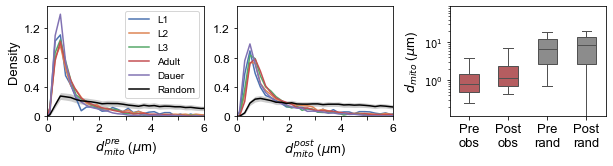

In [487]:
fig = plt.figure(figsize=(8.4,2.2), constrained_layout=True)
gs = fig.add_gridspec(1,3,wspace=0.03)

ax1 = fig.add_subplot(gs[0,0])
plot5(ax1)

ax2 = fig.add_subplot(gs[0,1])
plot6(ax2)

ax3 = fig.add_subplot(gs[0,2])
plot7(ax3)

plt.savefig("/home/jabae/Dropbox/SNU/Research/Celegans/Cmito/figures/figure_v2/panels/fig2_2.svg")
plt.show()

In [26]:
data = [adult_dist_pre,
        adult_dist_post,
        dist_list_rand_pre[np.random.randint(T)].reshape(-1,),
        dist_list_rand_post[np.random.randint(T)].reshape(-1,)]

In [18]:
ranksums(adult_dist_pre, adult_dist_post)

RanksumsResult(statistic=-25.265221284643157, pvalue=7.706115122933304e-141)

In [27]:
ranksums(data[0], data[2])

RanksumsResult(statistic=-58.188547072264264, pvalue=0.0)

In [28]:
ranksums(data[1], data[3])

RanksumsResult(statistic=-62.70541343741479, pvalue=0.0)

In [573]:
hl1_pre_cum = np.cumsum(hl1_pre)/np.sum(hl1_pre)
hl2_pre_cum = np.cumsum(hl2_pre)/np.sum(hl2_pre)
hl3_pre_cum = np.cumsum(hl3_pre)/np.sum(hl3_pre)
ha_pre_cum = np.cumsum(ha_pre)/np.sum(ha_pre)
hd_pre_cum = np.cumsum(hd_pre)/np.sum(hd_pre)

In [574]:
hl1_pre_cum_diff = np.diff(hl2_pre_cum)
hl2_pre_cum_diff = np.diff(hl2_pre_cum)
hl3_pre_cum_diff = np.diff(hl3_pre_cum)
ha_pre_cum_diff = np.diff(ha_pre_cum)
hd_pre_cum_diff = np.diff(hd_pre_cum)

In [588]:
l1_knee = np.round(bin_centers[:-1][hl1_pre_cum_diff<0.05][1],1)
l2_knee = np.round(bin_centers[:-1][hl2_pre_cum_diff<0.05][1],1)
l3_knee = np.round(bin_centers[:-1][hl3_pre_cum_diff<0.05][1],1)
ad_knee = np.round(bin_centers[:-1][ha_pre_cum_diff<0.05][1],1)
dr_knee = np.round(bin_centers[:-1][hd_pre_cum_diff<0.05][1],1)

In [589]:
print("Knee of cumulative distribution:")
print(f"L1 = {l1_knee}\nL2 = {l2_knee}\nL3 = {l3_knee}\nAdult = {ad_knee}\nDauer = {dr_knee}")

Knee of cumulative distribution:
L1 = 1.3
L2 = 1.3
L3 = 1.1
Adult = 1.1
Dauer = 1.1


## Synapse size is larger when mitochondria is nearby

In [32]:
def get_syn_size(syn_df):
    
    syn_id_list = np.unique(syn_df["syn_id"])
    n = syn_id_list.shape[0]
    syn_size = np.zeros(n)
    for i in range(n):

        syn_id = syn_id_list[i]
        syn_loc = syn_df[syn_df["syn_id"]==syn_id][["x_pos", "y_pos", "z_pos"]].values[0,:]/1000
        cell_id = syn_df[syn_df["syn_id"]==syn_id]["pre_common_id"].values[0]

        syn_size[i] = np.sum(syn_df[syn_df["syn_id"]==syn_id]["size"])/10**9
        
    return syn_size

def get_dist_from_mito(mito_df, syn_df, mode="pre"):
    
    syn_loc_list = syn_df[["x_pos", "y_pos", "z_pos"]].values/1000
    
    nmito = mito_df.shape[0]
    
    dist_from_mito = np.zeros(nmito)
    for i in range(nmito):
        
        cell_id = mito_df.iloc[i]["cell_common_id"]
        mito_loc = mito_df.iloc[i][["x_pos", "y_pos", "z_pos"]].values
                                 
        if mode=="pre":
            
            valid = syn_df["pre_common_id"]==cell_id
            if np.sum(valid):
                
                dist_list = dist(syn_loc_list[valid,:], mito_loc)
                dist_from_mito[i] = np.min(dist_list)
                
        elif mode=="post":
            
            valid = syn_df["post_common_id"]==cell_id
            if np.sum(valid):
                
                dist_list = dist(syn_loc_list[valid,:], mito_loc)
                dist_from_mito[i] = np.min(dist_list)
                
    return dist_from_mito

In [20]:
l1_dmito_pre = get_dist_from_syn(l1_syn_df, l1_mito_df, "pre")
l2_dmito_pre = get_dist_from_syn(l2_syn_df, l2_mito_df, "pre")
l3_dmito_pre = get_dist_from_syn(l3_syn_df, l3_mito_df, "pre")
adult_dmito_pre = get_dist_from_syn(adult_syn_df, adult_mito_df, "pre")
dauer_dmito_pre = get_dist_from_syn(dauer_syn_df, dauer_mito_df, "pre")

l1_syn_size = get_syn_size(l1_syn_df)
l2_syn_size = get_syn_size(l2_syn_df)
l3_syn_size = get_syn_size(l3_syn_df)
adult_syn_size = get_syn_size(adult_syn_df)
dauer_syn_size = get_syn_size(dauer_syn_df)

valid = l1_dmito_pre>0
l1_dmito_pre = l1_dmito_pre[valid]
l1_syn_size = l1_syn_size[valid]

valid = l2_dmito_pre>0
l2_dmito_pre = l2_dmito_pre[valid]
l2_syn_size = l2_syn_size[valid]

valid = l3_dmito_pre>0
l3_dmito_pre = l3_dmito_pre[valid]
l3_syn_size = l3_syn_size[valid]

valid = adult_dmito_pre>0
adult_dmito_pre = adult_dmito_pre[valid]
adult_syn_size = adult_syn_size[valid]

valid = dauer_dmito_pre>0
dauer_dmito_pre = dauer_dmito_pre[valid]
dauer_syn_size = dauer_syn_size[valid]

In [ ]:
adult_dsyn_pre = get_dist_from_mito(adult_mito_df, adult_syn_df, "pre")
adult_dsyn_post = get_dist_from_mito(adult_mito_df, adult_syn_df, "post")
adult_mitovol = adult_mito_df["mito_vol"].values

valid = adult_dsyn_pre>0
adult_mitovol_pre = adult_mitovol[valid]
adult_dsyn_pre = adult_dsyn_pre[valid]

valid = adult_dsyn_post>0
adult_mitovol_post = adult_mitovol[valid]
adult_dsyn_post = adult_dsyn_post[valid]

In [ ]:
def plot8(ax):
    
    lw = 1.5
    xticks = [0,1,2,3,4,5,6]
    xticklab = ["0","","2","","4","","6"]
    
    binw = 0.2
    bins = np.arange(0,6+2*binw,binw)
    bin_centers = bins[:-1]+binw/2
    bin_centers = np.array([0] + list(bin_centers))
    
    ax.plot(bin_centers, l1_synsize_cum,
            color=stage_cmap[0], linewidth=lw, label="L1")
    ax.plot(bin_centers, l2_synsize_cum,
            color=stage_cmap[1], linewidth=lw, label="L2")
    ax.plot(bin_centers, l3_synsize_cum,
            color=stage_cmap[2], linewidth=lw, label="L3")
    ax.plot(bin_centers, adult_synsize_cum,
            color=stage_cmap[3], linewidth=lw, label="Adult")
    ax.plot(bin_centers, dauer_synsize_cum,
            color=stage_cmap[4], linewidth=lw, label="Dauer")
    
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklab, fontsize=13, fontname="Arial")
    ax.set_xlabel("$d_{mito}$ ($\mu$m)", fontsize=13, fontname="Arial")
    ax.set_ylabel("Cumulative prop.\nof mito. volume", fontsize=13, fontname="Arial")

def plot9(ax):
    
    xticks = [0,1,2,3,4,5,6]
    xticklab = ["0","","2","","4","","6"]
    yticks = np.arange(0,0.0081,0.002)
    yticklab = ["0","","0.004","","0.008"]
    
    ax.vlines(ad_knee, 0, 0.0081, color="r", linestyles="dashed")
    ax.plot(adult_dmito_pre, adult_syn_size, "k.",
            alpha=0.6, markeredgewidth=0, markersize=6)
    
    ax.set_xlim(0,6)
    ax.set_ylim(0,0.0081)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklab, fontsize=12, fontname="Arial")
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticklab, fontsize=12, fontname="Arial")
    ax.set_xlabel("$d_{mito}^{pre}$", fontsize=13, fontname="Arial")
    ax.set_ylabel("Synapse size ($\mu$m$^3$)", fontsize=13, fontname="Arial")
    
def plot10(ax):
    
    xticks = [0,1,2,3,4,5,6]
    xticklab = ["0","","2","","4","","6"]
    yticks = np.arange(0,0.26,0.05)
    yticklab = ["0","","0.1","","0.2",""]
    
    ax.vlines(ad_knee, 0, 0.26, color="r", linestyles="dashed")
    ax.plot(adult_dsyn_pre, adult_mitovol_pre, "k.",
            alpha=0.6, markeredgewidth=0, markersize=6)
    
    ax.set_xlim(0,6)
    ax.set_ylim(0,0.26)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklab, fontsize=12, fontname="Arial")
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticklab, fontsize=12, fontname="Arial")
    ax.set_xlabel("$d_{syn}^{pre}$", fontsize=13, fontname="Arial")
    ax.set_ylabel("Mito. volume ($\mu$m$^3$)", fontsize=13, fontname="Arial")
    
def plot11(ax):
    
    xticks = [0,1,2,3,4,5,6]
    xticklab = ["0","","2","","4","","6"]
    yticks = np.arange(0,0.26,0.05)
    yticklab = ["0","","0.1","","0.2",""]
    
    ax.vlines(ad_knee, 0, 0.26, color="r", linestyles="dashed")
    ax.plot(adult_dsyn_post, adult_mitovol_post, "k.",
            alpha=0.6, markeredgewidth=0, markersize=6)
    
    ax.set_xlim(0,6)
    ax.set_ylim(0,0.26)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklab, fontsize=12, fontname="Arial")
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticklab, fontsize=12, fontname="Arial")
    ax.set_xlabel("$d_{syn}^{post}$", fontsize=13, fontname="Arial")

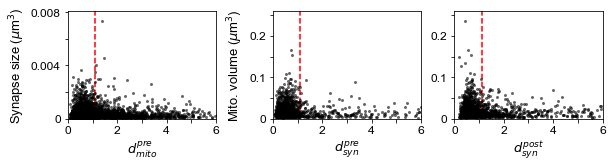

In [648]:
fig = plt.figure(figsize=(8.4,2.2), constrained_layout=True)
gs = fig.add_gridspec(1,3,wspace=0.03)

ax1 = fig.add_subplot(gs[0,0])
plot9(ax1)

ax2 = fig.add_subplot(gs[0,1])
plot10(ax2)

ax3 = fig.add_subplot(gs[0,2])
plot11(ax3)

plt.savefig("/home/jabae/Dropbox/SNU/Research/Celegans/Cmito/figures/figure_v2/panels/fig2_3.svg")
plt.show()

In [ ]:
def plot12a(ax, data):
    
    xticks = np.arange(2)
    xticklab = ["Near", "Far"]
    yticks = np.arange(0,0.0016,0.0005)
    yticklab = ["0","0.0005","0.0010","0.0015"]
    
    sns.boxplot(data=data, width=0.5, whis=[5,95],
                showfliers=False,
                palette=[stage_cmap[3],stage_cmap[3]])
    
    ax.set_ylim(0,0.0016)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklab, fontsize=18, fontname="Arial")
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticklab, fontsize=15, fontname="Arial")
    
def plot12b(ax, data):
    
    xticks = np.arange(2)
    xticklab = ["Near", "Far"]
    yticks = np.arange(0,0.062,0.02)
    yticklab = ["0","0.02","0.04","0.06"]
    
    sns.boxplot(data=data, width=0.5, whis=[5,95],
                showfliers=False,
                palette=[stage_cmap[3],stage_cmap[3]])
    
    ax.set_ylim(0,0.064)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklab, fontsize=18, fontname="Arial")
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticklab, fontsize=15, fontname="Arial")

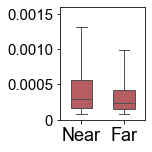

RanksumsResult(statistic=6.938665130876982, pvalue=3.958221357923569e-12)


In [635]:
data = [adult_syn_size[adult_dmito_pre<1.1],
        adult_syn_size[adult_dmito_pre>=1.1]]

fig = plt.figure(figsize=(2,2), constrained_layout=True)
gs = fig.add_gridspec(1,1)

ax = fig.add_subplot(gs[0,0])
plot12a(ax, data)
plt.savefig("/home/jabae/Dropbox/SNU/Research/Celegans/Cmito/figures/figure_v2/panels/fig2_3a.svg")
plt.show()

print(ranksums(data[0],data[1]))

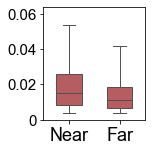

RanksumsResult(statistic=4.0066196050427365, pvalue=6.159394152090412e-05)


In [643]:
data = [adult_mitovol_pre[adult_dsyn_pre<1.1],
        adult_mitovol_pre[(adult_dsyn_pre>=1.1)*(adult_dsyn_pre<6)]]

fig = plt.figure(figsize=(2,2), constrained_layout=True)
gs = fig.add_gridspec(1,1)

ax = fig.add_subplot(gs[0,0])
plot12b(ax, data)
plt.savefig("/home/jabae/Dropbox/SNU/Research/Celegans/Cmito/figures/figure_v2/panels/fig2_3b.svg")
plt.show()

print(ranksums(data[0],data[1]))

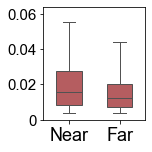

RanksumsResult(statistic=4.856571510740087, pvalue=1.1943566036696894e-06)


In [644]:
data = [adult_mitovol_post[adult_dsyn_post<1.1],
        adult_mitovol_post[(adult_dsyn_post>=1.1)*(adult_dsyn_post<6)]]

fig = plt.figure(figsize=(2,2), constrained_layout=True)
gs = fig.add_gridspec(1,1)

ax = fig.add_subplot(gs[0,0])
plot12b(ax, data)
plt.savefig("/home/jabae/Dropbox/SNU/Research/Celegans/Cmito/figures/figure_v2/panels/fig2_3c.svg")
plt.show()

print(ranksums(data[0],data[1]))

## Polyadic

In [33]:
def get_fanout_mitodist_pre(syn_df, mito_df):
    
    syn_id_list = np.unique(syn_df["syn_id"].values)
    n =  syn_id_list.shape[0]
    
    fanout_list = np.zeros(n, dtype="uint8")
    mitodist_list = np.zeros(n)
    for i in range(n):
        
        syn_id = syn_id_list[i]
        valid = syn_df["syn_id"]==syn_id
        preid = syn_df[valid]["pre_common_id"].values[0]
        preloc = syn_df[valid][["x_pos","y_pos","z_pos"]].values/1000
        preloc = preloc[0,:]
        
        fanout_list[i] = np.sum(valid)
        
        valid = mito_df["cell_common_id"]==preid
        if np.sum(valid)==0:
            continue
            
        mito_df_valid = mito_df[valid]
        mito_loc_list = mito_df_valid[["x_pos","y_pos","z_pos"]].values
        
        dist_list = dist(mito_loc_list, preloc)
        mitodist_list[i] = np.min(dist_list)
        
    return fanout_list, mitodist_list

def get_fanout_mitodist_post(syn_df, mito_df):
    
    n =  syn_df.shape[0]
    
    fanout_list = np.zeros(n, dtype="uint8")
    mitodist_list = np.zeros(n)
    for i in range(n):
        
        syn_id = syn_df.iloc[i]["syn_id"]
        valid = syn_df["syn_id"]==syn_id
        postid = syn_df.iloc[i]["post_common_id"]
        postloc = syn_df.iloc[i][["x_pos","y_pos","z_pos"]].values/1000
        
        fanout_list[i] = np.sum(valid)
        
        valid = mito_df["cell_common_id"]==postid
        if np.sum(valid)==0 or postid==0:
            continue
            
        mito_df_valid = mito_df[valid]
        mito_loc_list = mito_df_valid[["x_pos","y_pos","z_pos"]].values
        
        dist_list = dist(mito_loc_list, postloc)
        mitodist_list[i] = np.min(dist_list)
        
    return fanout_list, mitodist_list

def get_fanout_mitovol_pre(syn_df, mito_df):
    
    syn_id_list = np.unique(syn_df["syn_id"].values)
    n =  syn_id_list.shape[0]
    
    fanout_list = np.zeros(n, dtype="uint8")
    mitovol_list = np.zeros(n)
    for i in range(n):
        
        syn_id = syn_id_list[i]
        valid = syn_df["syn_id"]==syn_id
        preid = syn_df[valid]["pre_common_id"].values[0]
        preloc = syn_df[valid][["x_pos","y_pos","z_pos"]].values/1000
        preloc = preloc[0,:]
        
        fanout_list[i] = np.sum(valid)
        
        valid = mito_df["cell_common_id"]==preid
        if np.sum(valid)==0:
            continue
            
        mito_df_valid = mito_df[valid]
        mito_loc_list = mito_df_valid[["x_pos","y_pos","z_pos"]].values
        
        dist_list = dist(mito_loc_list, preloc)
        
        if np.min(dist_list)<3:
            mitovol_list[i] = mito_df_valid.iloc[np.argmin(dist_list)]["mito_vol"]
#         mitovol_list[i] = np.sum(mito_df_valid.iloc[dist_list<1.5]["mito_vol"])
        
    return fanout_list, mitovol_list

def get_fanout_mitovol_post(syn_df, mito_df):
    
    n = syn_df.shape[0]
    
    fanout_list = np.zeros(n, dtype="uint8")
    mitovol_list = np.zeros(n)
    for i in range(n):
        
        syn_id = syn_df.iloc[i]["syn_id"]
        valid = syn_df["syn_id"]==syn_id
        postid = syn_df.iloc[i]["post_common_id"]
        postloc = syn_df.iloc[i][["x_pos","y_pos","z_pos"]].values/1000
        
        fanout_list[i] = np.sum(valid)
        
        valid = mito_df["cell_common_id"]==postid
        if np.sum(valid)==0:
            continue
            
        mito_df_valid = mito_df[valid]
        mito_loc_list = mito_df_valid[["x_pos","y_pos","z_pos"]].values
        
        dist_list = dist(mito_loc_list, postloc)
        
        if np.min(dist_list)<3:
            mitovol_list[i] = mito_df_valid.iloc[np.argmin(dist_list)]["mito_vol"]
#         mitovol_list[i] = np.sum(mito_df_valid.iloc[dist_list<1.5]["mito_vol"])
        
    return fanout_list, mitovol_list

In [34]:
adult_syn_size = get_syn_size(adult_syn_df)

In [35]:
adult_fanout_pre, adult_mitodist_pre = get_fanout_mitodist_pre(adult_syn_df, adult_mito_df)
adult_fanout_dist_post, adult_mitodist_post = get_fanout_mitodist_post(adult_syn_df, adult_mito_df)
adult_fanout_vol_pre, adult_mitovol_pre = get_fanout_mitovol_pre(adult_syn_df, adult_mito_df)
adult_fanout_vol_post, adult_mitovol_post = get_fanout_mitovol_post(adult_syn_df, adult_mito_df)

In [36]:
valid = adult_mitodist_pre>0
adult_fanout_dist_pre = adult_fanout_pre[valid]
adult_mitodist_pre = adult_mitodist_pre[valid]

valid = adult_mitodist_post>0
adult_fanout_dist_post = adult_fanout_dist_post[valid]
adult_mitodist_post = adult_mitodist_post[valid]

valid = adult_mitovol_pre>0
adult_fanout_vol_pre = adult_fanout_vol_pre[valid]
adult_mitovol_pre = adult_mitovol_pre[valid]

valid = adult_mitovol_post>0
adult_fanout_vol_post = adult_fanout_vol_post[valid]
adult_mitovol_post = adult_mitovol_post[valid]

In [37]:
synsize_pre_list = [adult_syn_size[adult_fanout_pre==i]
                    for i in range(1,6)]
mitodist_pre_list = [adult_mitodist_pre[adult_fanout_dist_pre==i]
                     for i in range(1,6)]
mitodist_post_list = [adult_mitodist_post[adult_fanout_dist_post==i]
                      for i in range(1,6)]
mitovol_pre_list = [adult_mitovol_pre[adult_fanout_vol_pre==i]
                    for i in range(1,6)]
mitovol_post_list = [adult_mitovol_post[adult_fanout_vol_post==i]
                     for i in range(1,6)]

In [39]:
cmap = sns.color_palette("hls", 8)

def stderr(arr):
    
    return np.std(arr)/arr.shape[0]**0.5

def plot13(ax):
    
    xticks = np.arange(5)
    xticklab = ["1","2","3","4","5"]
    yticks = np.arange(0,0.0038,0.001)
    yticklab = ["0.000","0.001","0.002","0.003"]
    
    sns.boxplot(synsize_pre_list, whis=[5,95],
                palette=[stage_cmap[3]]*5, showfliers=False)
    
    ax.set_ylim(0,0.0037)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklab, fontsize=12, fontname="Arial")
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticklab, fontsize=12, fontname="Arial")
    ax.set_xlabel("Fan-out", fontsize=13, fontname="Arial")
    ax.set_ylabel("Syn. size ($\mu$m$^3$)", fontsize=13, fontname="Arial")
    
def plot14(ax):
    
    xticks = np.arange(1,6)
    xticklab = ["1","2","3","4","5"]
    yticks = np.arange(1,3.6,0.5)
    yticklab = ["1","","2","","3",""]
    
    mean_pre = [np.mean(mitodist_pre_list[i]) for i in range(5)]
    stderr_pre = [stderr(mitodist_pre_list[i]) for i in range(5)]
    mean_post = [np.mean(mitodist_post_list[i]) for i in range(5)]
    stderr_post = [stderr(mitodist_post_list[i]) for i in range(5)]
    
    ax.errorbar(np.arange(1,6), mean_pre, yerr=stderr_pre,
                capsize=4, color=cmap[0])
    ax.errorbar(np.arange(1,6), mean_post, yerr=stderr_post,
                capsize=4, color=cmap[5])
    

    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklab, fontsize=12, fontname="Arial")
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticklab, fontsize=12, fontname="Arial")
    ax.set_xlabel("Fan-out", fontsize=13, fontname="Arial")
    ax.set_ylabel("$d_{syn}$ ($\mu$m)", fontsize=13, fontname="Arial")
    
def plot15(ax):
    
    xticks = np.arange(1,6)
    xticklab = ["1","2","3","4","5"]
    yticks = np.arange(0.02,0.033,0.002)
    yticklab = ["0.020","","0.024","","0.028","","0.032"]
    
    mean_pre = [np.mean(mitovol_pre_list[i]) for i in range(5)]
    stderr_pre = [stderr(mitovol_pre_list[i]) for i in range(5)]
    mean_post = [np.mean(mitovol_post_list[i]) for i in range(5)]
    stderr_post = [stderr(mitovol_post_list[i]) for i in range(5)]
    
    ax.errorbar(np.arange(1,6), mean_pre, yerr=stderr_pre,
                capsize=4, color=cmap[0])
#     ax.errorbar(np.arange(1,6), mean_post, yerr=stderr_post,
#                 capsize=5, color=cmap[5])
    
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklab, fontsize=12, fontname="Arial")
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticklab, fontsize=12, fontname="Arial")
    ax.set_xlabel("Fan-out", fontsize=13, fontname="Arial")
    ax.set_ylabel("Mito. volume ($\mu$m$^3$)", fontsize=13, fontname="Arial")

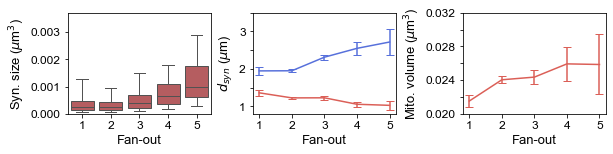

In [40]:
fig = plt.figure(figsize=(8.4,2), constrained_layout=True)
gs = fig.add_gridspec(1,3,wspace=0.03)

ax1 = fig.add_subplot(gs[0,0])
plot13(ax1)

ax2 = fig.add_subplot(gs[0,1])
plot14(ax2)

ax3 = fig.add_subplot(gs[0,2])
plot15(ax3)

plt.savefig("/home/jabae/Dropbox/SNU/Research/Celegans/Cmito/figures/figure_v2/panels/fig2_4.svg")
plt.show()

In [63]:
ranksums(synsize_pre_list[0], synsize_pre_list[2])

RanksumsResult(statistic=-8.180265504219543, pvalue=2.8321913681510884e-16)

In [61]:
ranksums(mitodist_pre_list[0], mitodist_pre_list[4])

RanksumsResult(statistic=-0.5396221607811194, pvalue=0.5894576305382613)

In [57]:
ranksums(mitodist_post_list[0], mitodist_post_list[4])

RanksumsResult(statistic=-3.7206715126076153, pvalue=0.00019869374649813677)

In [55]:
ranksums(mitovol_pre_list[0], mitovol_pre_list[4])

RanksumsResult(statistic=-1.0448546007501855, pvalue=0.29609017505177204)